<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

# 1. Import libraries, classes, custom functions and data load</h1>

In [14]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import plotly.express as px

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.util import ngrams
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from spacy.lang.en import English
import utility_func as utils
from wordcloud import WordCloud
from langdetect import detect_langs
from gensim.models import Word2Vec

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

# 2. Data Understanding

## 2.1 Data Source and Description

In [15]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
reviews = LoadReviews()
utils.YelpDatasets_Revies(reviews_df = reviews)


Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1295256 to 6544963
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    5000 non-null   object        
 1   user_id      5000 non-null   object        
 2   business_id  5000 non-null   object        
 3   stars        5000 non-null   int64         
 4   useful       5000 non-null   int64         
 5   funny        5000 non-null   int64         
 6   cool         5000 non-null   int64         
 7   text         5000 non-null   object        
 8   date         5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 390.6+ KB


In [7]:
reviews.describe()

,stars,useful,funny,cool
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.758400,1.152400,0.320800,0.480400
std,1.481374,2.805984,1.506632,2.256155
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,88.000000,55.000000,95.000000


## 2.2 Exploratory Data Analysis

In [3]:
reviews = reviews.sample(n=5000, random_state=42)
display(reviews)
reviews.describe()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25
...,...,...,...,...,...,...,...,...,...
5884448,bXXRzBg7DuGnY8ij4INBWg,9fP3KiiVpFVYcnqgD3aZJw,iaBU5h_j0TCrUFzTbjFIlw,3,9,0,0,I am not sure what to think of this place. I b...,2013-04-09 22:29:48
6745875,FkekUQC8z63ywSFQnK4Z4w,JLW2uULP_Q1KXHhToNljcQ,jMStvE-tQzSpRCAO0nAE6g,3,5,2,8,I'm so excited to see the red Robin had re-ope...,2018-09-27 23:47:13
5730804,4IzbwfjgwUq1gXKA97Erwg,lESGYBwhs9ZtpWeJf_2Zig,hGCETx03FN8Qtx1T8StHaQ,5,0,0,0,This is our go-to pizza place! We love their ...,2018-09-05 23:00:37
1995249,23xRe5HtAsPlHyUuM7AFTQ,5pgl40PSrB-dTbEg-eWIFA,ecapYwbEvmKHKAfsGA4tow,4,3,0,0,This is located in a great spot fairly close t...,2014-02-13 22:54:43


,stars,useful,funny,cool
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.758400,1.152400,0.320800,0.480400
std,1.481374,2.805984,1.506632,2.256155
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,88.000000,55.000000,95.000000


### 2.2.1 Distribution of reviews and stars

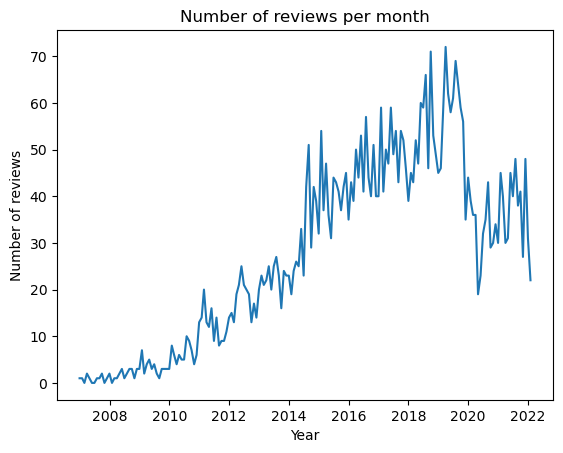

In [9]:
reviews['date'] = pd.to_datetime(reviews['date'])
df = reviews.set_index('date')
plt.plot(df['text'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

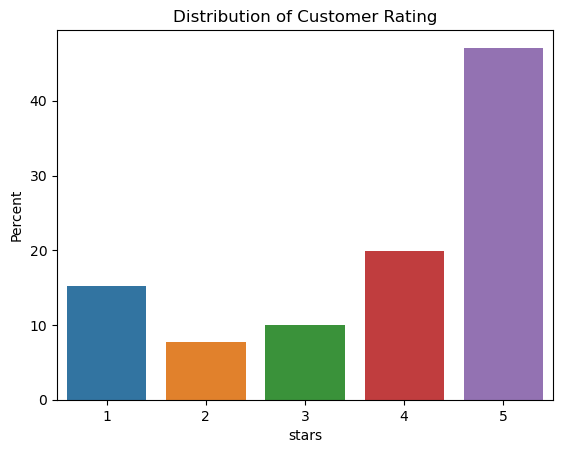

In [5]:
ax = sns.barplot(data=reviews, x='stars', y='stars', estimator=lambda x: len(x) / len(reviews) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

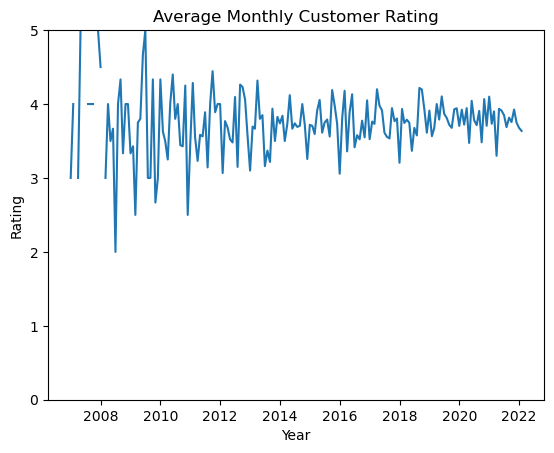

In [11]:
plt.plot(df['stars'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5)
plt.show()

### 2.2.2 Text Length

### 2.2.2.1 To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [13]:
reviews['text length'] = reviews['text'].apply(len)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text length
3794719,O6bpWULxbI9-0ZgAz7hYcQ,dxGxq_KX9j9KvKO0GMyvRw,-0EdehHjIQc0DtYU8QcAig,5,0,0,0,Have eaten at New Tung Tung for several years ...,2018-12-04 22:41:28,178
2716988,e8tzUrpjac5Uqg6OytCwEQ,tWdxHG8-UGJncCp-BgJIhg,Z4PF4EtM12L7nwOHZHFJNA,2,1,0,0,I've been vegan/vegetarian for 21 yrs and was ...,2016-08-15 01:37:59,779
2932156,2rZ5lltnzlBfE2jEgQ102g,h0i0cpoCmiwOwERRI2yWpA,mpf51URhzEQQjc186BKUcA,2,1,0,0,Service was absolutely great. Our waitress was...,2017-10-06 19:41:28,560
702597,Ke1esEdGLpXw9zpufBgIrw,koYnchCFCDXo0ac0sgFhlA,coR0dFgGOU7fVku6xDdH-A,1,1,0,0,"As a drop in, I could not understand how peopl...",2012-11-02 07:43:16,210
4830413,1dTBYUD5zkb2kFo7ztu-3Q,4ExV-552BD1zk3TBBOa1gg,LYgLZ6mMp15rpMJqOEEKPQ,1,0,0,0,In response to my prior review one of the owne...,2021-11-01 21:51:36,896


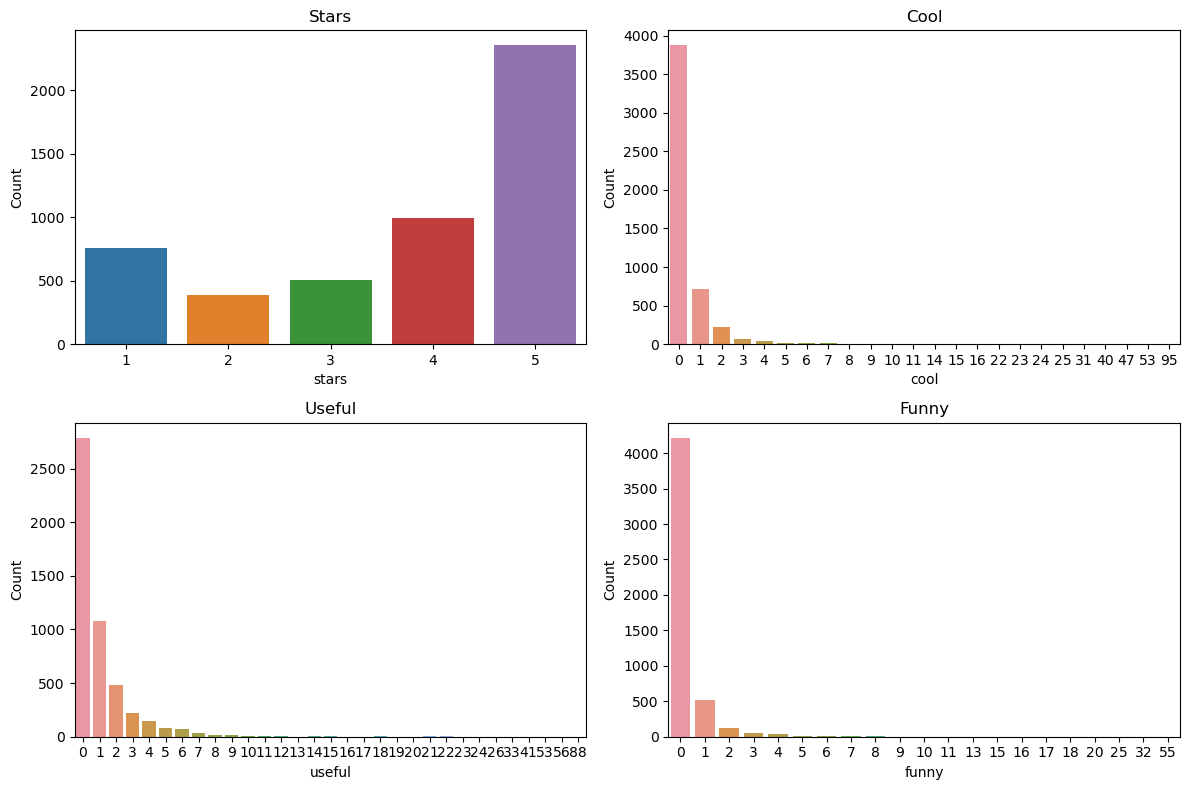

In [14]:
fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1 = sns.countplot(x='stars', data=reviews)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

axes2 = plt.subplot(2,2,2)
axes2 = sns.countplot(x='cool', data=reviews)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

axes3 = plt.subplot(2,2,3)
axes3 = sns.countplot(x='useful', data=reviews)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

axes4 = plt.subplot(2,2,4)
axes4 = sns.countplot(x='funny', data=reviews)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

### 2.2.2.2 Seaborn’s FacetGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

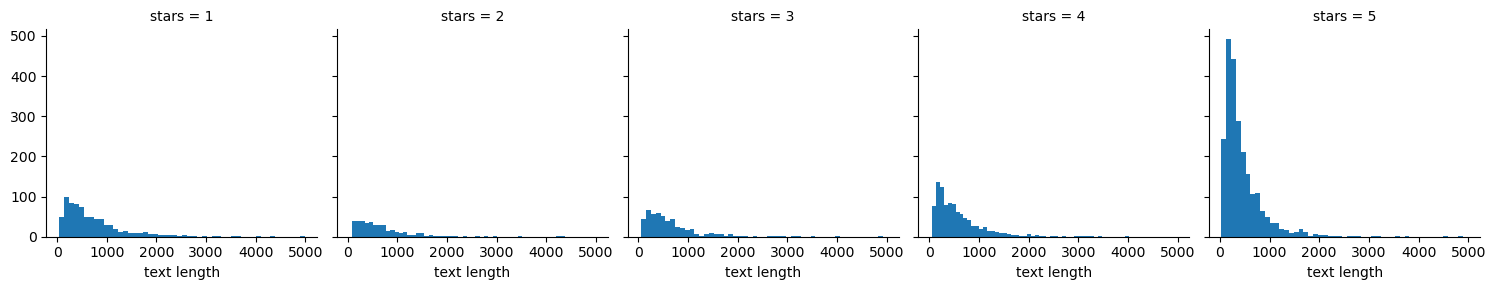

In [15]:
g = sns.FacetGrid(data=reviews, col='stars')
g.map(plt.hist, 'text length', bins=50)

C:\Users\pport\AppData\Local\Temp\ipykernel_33424\313122982.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews['text length'], kde=True, bins=50)


Text(0.5, 1.0, 'Text Length Distribution')

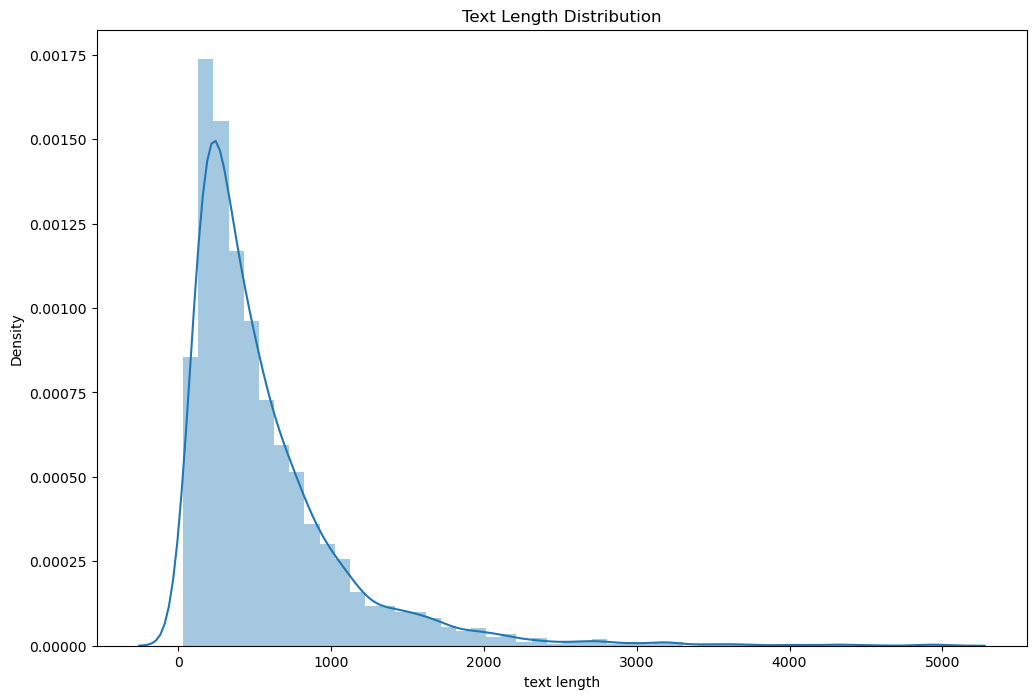

In [16]:
# Text Length
fig = plt.figure(figsize=(12,8))
sns.distplot(reviews['text length'], kde=True, bins=50)
plt.title('Text Length Distribution')

### 2.2.2.2 Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

<Axes: xlabel='stars', ylabel='text length'>

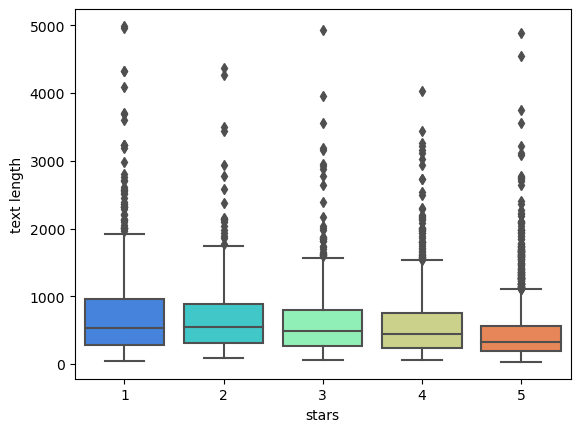

In [17]:
sns.boxplot(x='stars', y='text length', data=reviews, palette='rainbow')

### 2.2.2.3 Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr()method from Pandas to find any correlations in the dataframe.

In [18]:
stars = reviews.groupby('stars').mean()
stars.corr()

C:\Users\pport\AppData\Local\Temp\ipykernel_33424\1148758039.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars = reviews.groupby('stars').mean()


,useful,funny,cool,text length
useful,1.000000,0.994864,-0.653334,0.808545
funny,0.994864,1.000000,-0.624593,0.831117
cool,-0.653334,-0.624593,1.000000,-0.822301
text length,0.808545,0.831117,-0.822301,1.000000


#### 2.2.2.4 To visualise these correlations, we can use Seaborn’s heatmap. Looking at the map, funny is strongly correlated with useful, and usefulseems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

Text(0.5, 1.0, 'Heatmap of Variables')

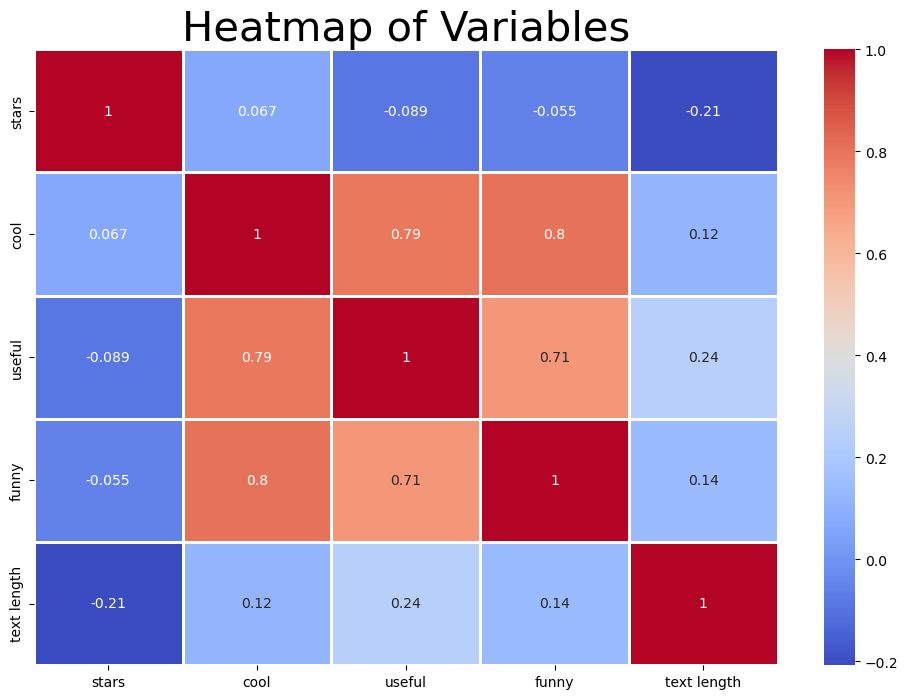

In [19]:
yelp_cor = reviews[['stars', 'cool', 'useful', 'funny', 'text length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

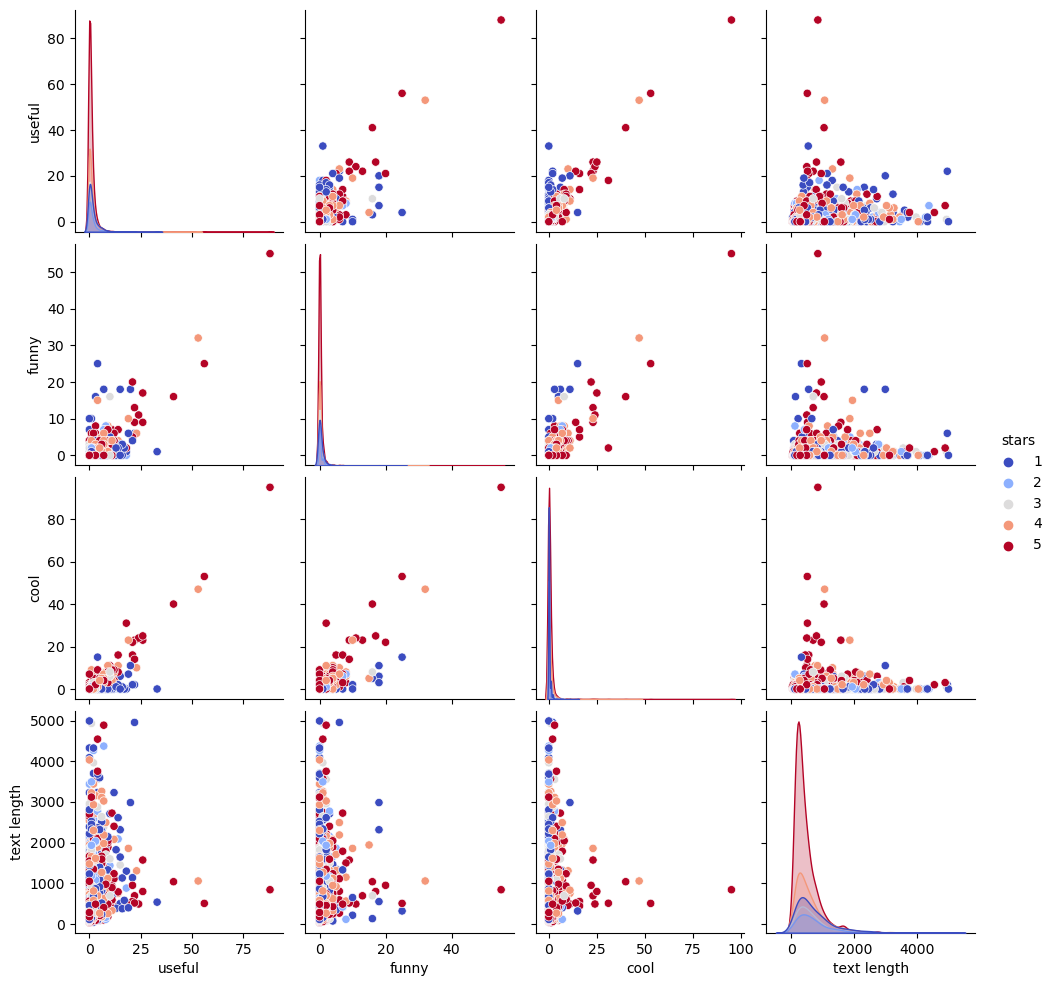

In [20]:
sns.pairplot(reviews, hue='stars', palette='coolwarm')

## 2.3 Data cleaning (Add prof stuff)

### 2.3.1 In the review, some character references such as “&amp;amp;” are not useful in our text content and I removed them.

In [21]:
reviews['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in reviews['text']]

### 2.3.2 Next, we wanted to make sure all the reviews are in English and we did the language detection with a library called langdetect and the specific function detect_langs.

In [22]:
language = [detect_langs(i) for i in reviews.text]
languages = [str(i[0]).split(':')[0] for i in language]
reviews['language'] = languages

# 3. Text Mining

## 3.1 Stopwords

In [24]:
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place', 'br', 'href', 'good', 'great'])

## 3.2 Word Cloud

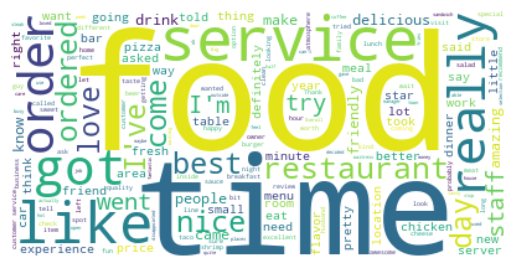

In [7]:
# concatenate all the reviews into one single string 
full_text = ' '.join(reviews['text'])
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3.3 Tokenization and Bag-of-Words (BoW)

In [14]:
nltk.download('punkt')
lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

word_pairs = list(ngrams(tokens, 2))
# Calculate the frequency distribution of pairs of 2 words
bigram_dist = FreqDist(word_pairs)
dist_pair = pd.DataFrame(bigram_dist.most_common(20),columns=['Words', 'Frequency'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


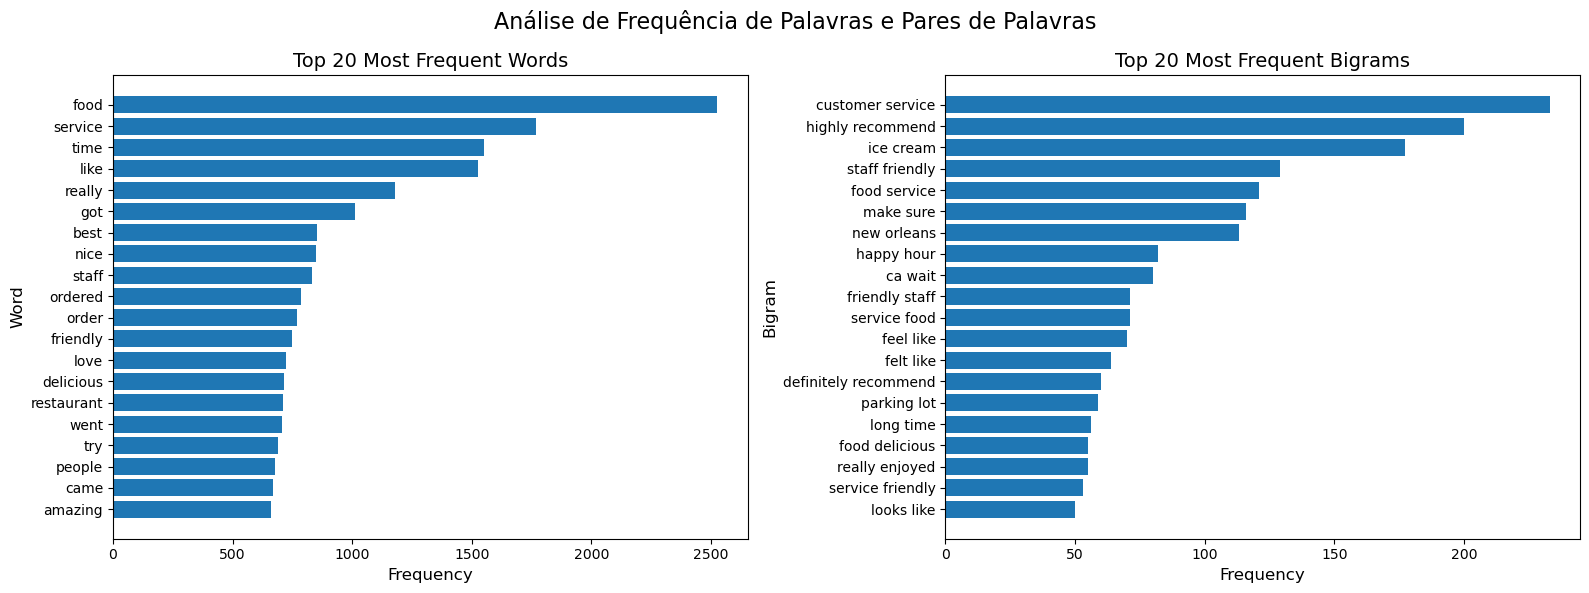

In [22]:
# Create a figure with two subplots (one for the top 20 words and one for the top 20 bigrams)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the top 20 words
axes[0].barh(dist['Word'], dist['Frequency'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_ylabel('Word', fontsize=12)
axes[0].set_title('Top 20 Most Frequent Words', fontsize=14)

# Convert the tuples in 'dist_pair['Words']' to strings
bigram_strings = [' '.join(pair) for pair in dist_pair['Words']]

# Plot the top 20 bigrams
axes[1].barh(bigram_strings, dist_pair['Frequency'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Pairs of Words', fontsize=12)
axes[1].set_title('Top 20 Most Frequent Pairs of Words', fontsize=14)

# Adjust the spacing between subplots
plt.suptitle('Word and Word Pair Frequency Analysis', fontsize=16)
plt.tight_layout()

# Show the plots
plt.show()

In [25]:
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])

# Aplicar stemming aos pares de palavras (bigrams)
stemmed_bigram_dist = FreqDist([(porter.stem(word1), porter.stem(word2)) for word1, word2 in word_pairs])
stemmed_dist_pair = pd.DataFrame(stemmed_bigram_dist.most_common(20), columns=['Words', 'Frequency'])

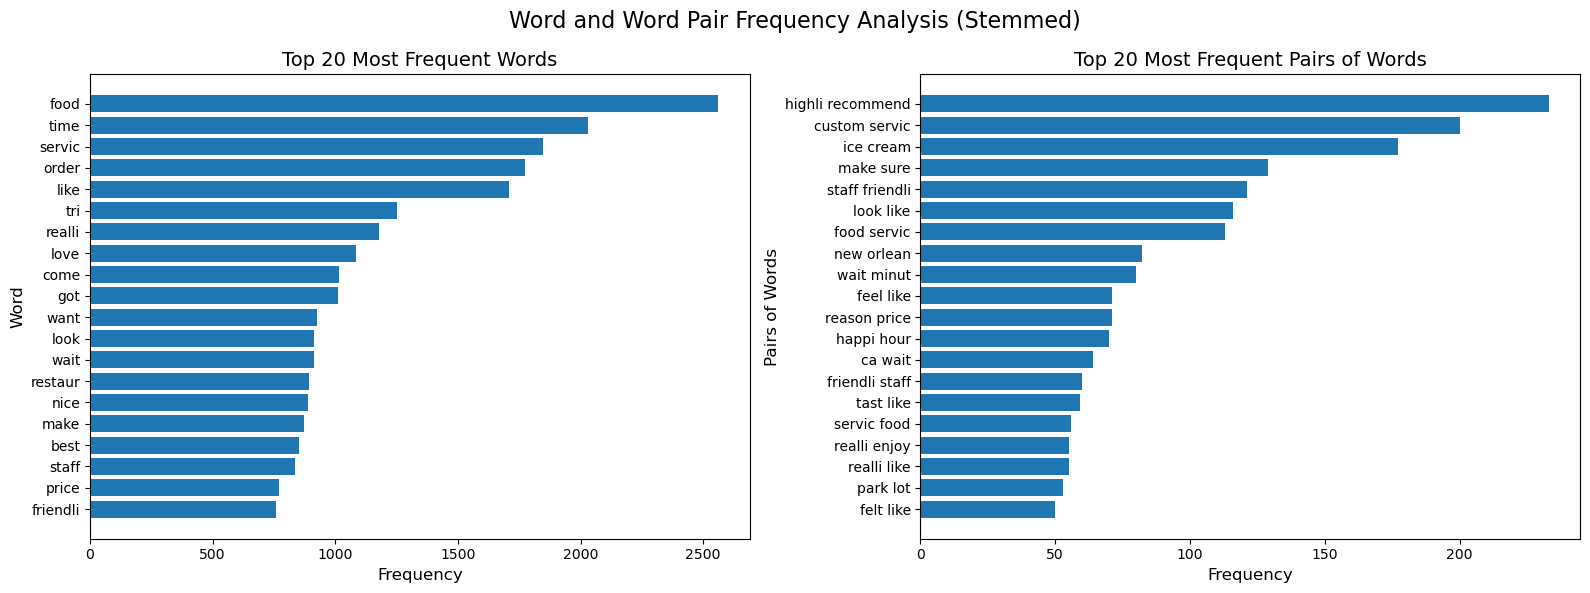

In [26]:
# Create a figure with two subplots (one for the top 20 words and one for the top 20 bigrams)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the top 20 words
axes[0].barh(stemmed_dist['Word'], stemmed_dist['Frequency'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_ylabel('Word', fontsize=12)
axes[0].set_title('Top 20 Most Frequent Words', fontsize=14)

# Convert the tuples in 'dist_pair['Words']' to strings
bigram_strings = [' '.join(pair) for pair in stemmed_dist_pair['Words']]

# Plot the top 20 bigrams
axes[1].barh(bigram_strings, dist_pair['Frequency'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Pairs of Words', fontsize=12)
axes[1].set_title('Top 20 Most Frequent Pairs of Words', fontsize=14)

# Adjust the spacing between subplots
plt.suptitle('Word and Word Pair Frequency Analysis (Stemmed)', fontsize=16)
plt.tight_layout()

# Show the plots
plt.show()

## 3.4 N-grams

In [32]:
# Convert the set of stop words into a list
my_stop_words_list = list(my_stop_words)

# Create the vectorizer with the stop words as a list
vect = CountVectorizer(stop_words=my_stop_words_list, ngram_range=(2, 2))
bigrams = vect.fit_transform(reviews['text'])

# Get the feature names (bigrams)
feature_names = vect.get_feature_names_out()

# Create a DataFrame with the bigrams and their frequencies
bigram_df = pd.DataFrame(bigrams.toarray(), columns=feature_names)

# Calculate the total frequency of each bigram
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']

# Sort the bigrams by frequency in descending order and take the first 20
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

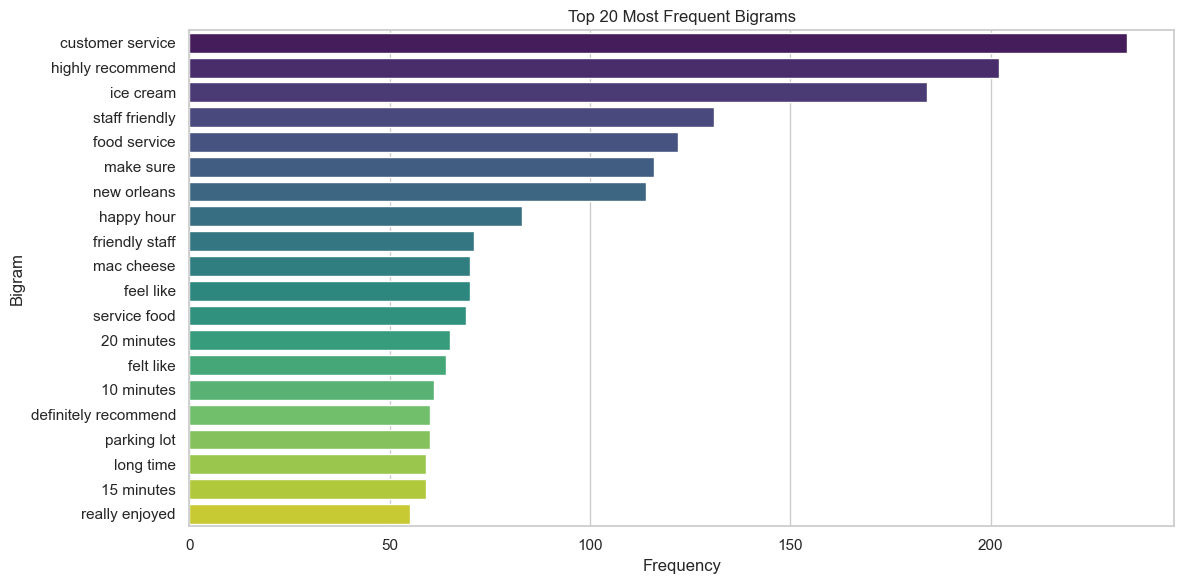

In [33]:
# Set the plot style (optional)
sns.set(style="whitegrid")

# Create a figure and an axis for the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='bigram', data=bigram_frequency, palette='viridis')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 20 Most Frequent Bigrams')

# Display the graph
plt.tight_layout()
plt.show()

## 3.5 Word2Vec

In [37]:
from nltk.tokenize import sent_tokenize
import re

df_good = reviews[reviews['stars'] > 3].copy()
good_reviews = ' '.join(df_good.text)
# split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
# get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [39]:
good_token_clean

[['needed', 'new', 'tires', 'wife', 'car'],
 ['special',
  'order',
  'day',
  'dropped',
  'morning',
  'work',
  'called',
  'hours',
  'later',
  'car',
  'ready'],
 ['quick', 'efficient', 'woman', 'helped', 'awesome'],
 ['jim', 'woltman', 'works', 'goleta', 'honda', 'stars'],
 ['knowledgeable', 'helpful', 'personable'],
 ['fantastic', 'job', 'honda'],
 ['thank', 'jim'],
 ['thank', 'honda', 'fabulous', 'employee'],
 ['times', 'shrimp'],
 ['got', 'nice', 'selection', 'different', 'fish'],
 ['prices', 'decent'],
 ['seafood', 'market', 'area'],
 ['fantastic', 'eat', 'hungry', 'need', 'snack'],
 ['price'],
 ['friendly', 'staff', 'clean', 'pleasant', 'visit', 'friends'],
 ['walked', 'door', 'greeted', 'welcoming', 'smile'],
 ['offered', 'help', 'finding', 'match', 'home'],
 ['told', 'like', 'return', 'money', '-', 'problem'],
 ['nice', 'experience', 'fair', 'pricing'],
 ['beats', 'pizza', 'beer', 'book'],
 ['nails', 'eye', 'sustainability', 'makes', 'feel'],
 ['specially',
  'brewed',
  

In [40]:
model_ted = Word2Vec(sentences=good_token_clean, vector_size=500, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('jog', 0.0003101218),
 ('declared', 0.00030188393),
 ('buffa', 0.00029340477),
 ('exhaustive', 0.00027973155),
 ('terminals', 0.00027947454),
 ('astonishingly', 0.00027662035),
 ('momos', 0.00027189977),
 ('substitutes', 0.00026974664),
 ('axle', 0.00026618096),
 ('accomodate', 0.00026190004)]

# 4. Sentiment Analysis

## 4.1 Lexicon-based Tool — VADER

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

n_samples = 100
reviews_vader = reviews.sample(n=n_samples, random_state=42)
# Converter a coluna 'date' para datetime
reviews_vader['date'] = pd.to_datetime(reviews_vader['date'])
# Create 'target' column based on the specified conditions
reviews_vader['target'] = reviews_vader['stars'].apply(lambda rating: 1 if rating > 3 else (-1 if rating < 3 else 0))

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = reviews_vader['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])

# Definir a coluna 'date' como índice
sentiment.index = reviews_vader['date']

# Agora você pode usar resample para calcular a média mensal
monthly_sentiment = sentiment.resample('M').mean()

# Now, add your code for evaluating sentiment analysis performance
y_pred = []
y = reviews_vader['target']
for rev in reviews_vader['text']:
    y_pred.append(1 if sid.polarity_scores(rev)['compound'] > 0 else 0)

print('Accuracy: ', accuracy_score(y, y_pred))
print('Precision: ', precision_score(y, y_pred, average='weighted'))
print('Recall: ', recall_score(y, y_pred, average='weighted'))
print('F1: ', f1_score(y, y_pred, average='weighted'))

Accuracy:  0.62
Precision:  0.45861091424521616
Recall:  0.62
F1:  0.5270833333333333


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


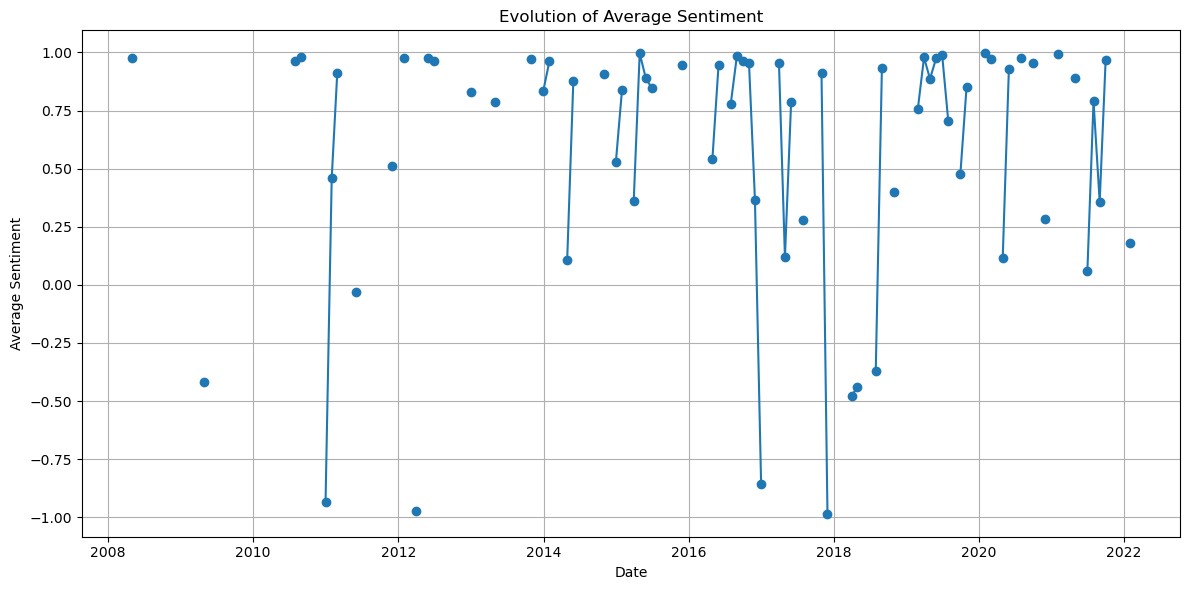

In [11]:
# Plot the monthly sentiment scores
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-')
ax.set_title('Evolution of Average Sentiment')  # Correção aqui
ax.set_xlabel('Date')  # Correção aqui
ax.set_ylabel('Average Sentiment')  # Correção aqui
ax.grid(True)

# Format the x-axis to show only the years
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))

# Set the background color to white
ax.set_facecolor('white')

# Show the graph
plt.tight_layout()
plt.show()

## 4.2 Supervised Learning Classifiers

In [20]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,-1
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14,1
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48,1
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,1
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,1
...,...,...,...,...,...,...,...,...,...,...
2390488,0laI5P_vFjwweuUlfWxKGQ,4_IJKLhoyof73pvRal4Exw,lnT7jlgdGpn-vppgToIDCg,4,0,0,0,"*insert obligatory ""this place is the wurst!"" ...",2016-08-22 15:31:11,1
4056403,EAANX3dEMYi9YYc7YK3uaw,1qNNag3F2BT2mieQ_pHPew,RmJJ979n9a2AZLUSe7_X6Q,1,3,0,0,I have been dying to try a Peruvian restaurant...,2018-10-02 18:31:14,-1
1678934,6cLuh2_2geVyoWqIdeQpHw,34pn-3SpyUnWUf9Ck4-Eww,-loV4cB2Uh9TCltTRgGzWQ,5,0,0,0,I love Renaud's more than any other place in S...,2013-12-26 22:47:50,1
6893186,47cDIdgGxJSu8CWgHVM5dA,UMMNuWMS_-TJqCcIA8lzfw,H3WJK0fpoPrIotWqOG_yIA,5,1,0,0,I can't believe it has taken me this long to w...,2021-01-11 13:37:19,1


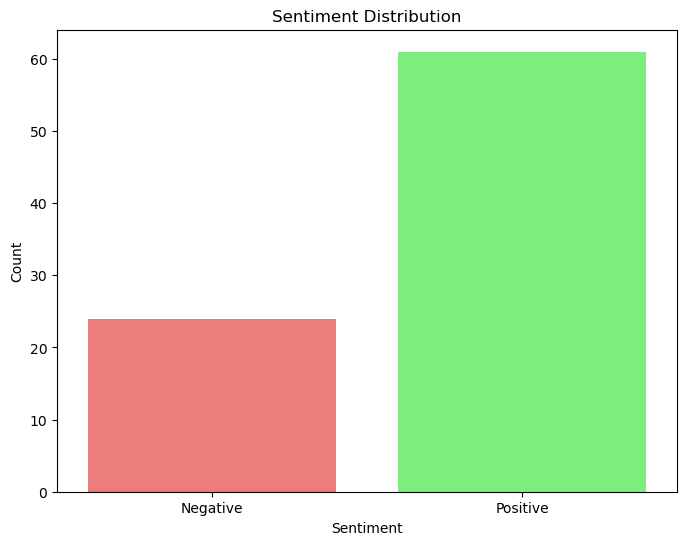

In [22]:
n_samples = 100
df = reviews.sample(n=n_samples, random_state=42)
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)

# Count the number of samples for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Define custom colors
colors = ['#FF6B6B', '#6BFF6B']

# Create a bar chart with custom colors and labels
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [27]:
# vectorization
vect = CountVectorizer(max_features=300, stop_words='english')
vect.fit(df.text)
X = vect.transform(df.text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59, 300), (26, 300), (59,), (26,))

### 4.2.1. Logistic Regression

In [28]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

Score on training set: 0.9830508474576272
Score on test set: 0.7307692307692307


In [29]:
print('The Confusion Matrix')
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr)
print('The Classification report')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix


,Predicted 0,Predicted 1
True 0,0,7
True 1,0,19


The Classification report


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,7.000000
1,0.730769,1.000000,0.844444,19.000000
accuracy,0.730769,0.730769,0.730769,0.730769
macro avg,0.365385,0.500000,0.422222,26.000000
weighted avg,0.534024,0.730769,0.617094,26.000000


In [30]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=0.0001, random_state=1))])

In [31]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating confusion matrix/ dataFrame
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_lr

Score on training set: 1.0
Score on test set: 0.7307692307692307


,Predicted 0,Predicted 1
True 0,0,7
True 1,0,19


### 4.2.2 Random Forest

In [33]:
my_random_forest = RandomForestClassifier(random_state=1)
my_random_forest.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.7307692307692307


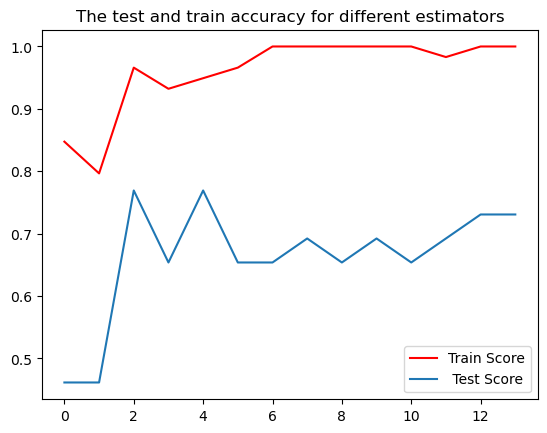

3


In [34]:
dt_train=[]
dt_test=[]
depth=[]
for i in range(1,15):
    my_random_forest = RandomForestClassifier(n_estimators=i,random_state=1)
    my_random_forest.fit(X_train,y_train)
    dt_train.append(my_random_forest.score(X_train,y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

plt.figure()
plt.title('The test and train accuracy for different estimators')
plt.plot(dt_train,color='red',label='Train Score')
plt.plot(dt_test,label=' Test Score')
plt.legend()
plt.show()
print(depth[np.argmax(dt_test)])

#### 4.2.2.1 Now we found the optimal n_estimators as 13, the both train and test accuracy are increased.

In [38]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [39]:
# Creating confusion matrix/ dataFrame
con_mat_RF = confusion_matrix(y_test, y_pred_rand)
df_cm_RF = pd.DataFrame(con_mat_RF, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_RF

,Predicted 0,Predicted 1
True 0,2,5
True 1,2,17


### 4.2.3 XGBoost

In [41]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})

XGB_model.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model.score(X_test, y_test_mapped)}")

XG Boost train score: 1.0
XG Boost test score: 0.7307692307692307


In [42]:
# Generate and display the confusion matrix
print('The Confusion Matrix')
con_mat_xgb = confusion_matrix(y_test_mapped, XGB_model.predict(X_test))
df_cm_xgb = pd.DataFrame(con_mat_xgb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb)

# Generate and display the classification report
print('The Classification report')
report_xgb = classification_report(y_test_mapped, XGB_model.predict(X_test), output_dict=True)
df_report_xgb = pd.DataFrame(report_xgb).transpose()
display(df_report_xgb)

The Confusion Matrix


,Predicted 0,Predicted 1
True 0,2,5
True 1,2,17


The Classification report


,precision,recall,f1-score,support
0,0.500000,0.285714,0.363636,7.000000
1,0.772727,0.894737,0.829268,19.000000
accuracy,0.730769,0.730769,0.730769,0.730769
macro avg,0.636364,0.590226,0.596452,26.000000
weighted avg,0.699301,0.730769,0.703906,26.000000


In [46]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=500, 

In [49]:
# Create the XGBoost model with the specified hyperparameters
XGB_model = XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB = XGB_model.predict(X_test)

# Training score
train_score = XGB_model.score(X_train, y_train_mapped)
test_score = XGB_model.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Creating confusion matrix and DataFrame
con_mat_XGB = confusion_matrix(y_test_mapped, y_pred_XGB)
df_cm_XGB = pd.DataFrame(con_mat_XGB, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
df_cm_XGB

Score on training set: 1.0
Score on test set: 0.7307692307692307


,Predicted 0,Predicted 1
True 0,2,5
True 1,2,17
